In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import pickle
import random
import numpy as np
from asyncio import exceptions

In [3]:
def pickle_load(dir, filename):
  # open a file, where you stored the pickled data
  file = open(os.path.join(dir,filename), 'rb')

  # dump information to that file
  data = pickle.load(file)

  # close the file
  file.close()
  return data

In [4]:
dir = 'Pickle'
train_data_x = pickle_load(dir, "train_data_x.pk")
train_data_y = pickle_load(dir, "train_data_y.pk")

test_data_x = pickle_load(dir, "test_data_x.pk")
test_data_y = pickle_load(dir, "test_data_y.pk")

In [5]:
print(train_data_x.shape, train_data_y.shape)
print(test_data_x.shape, test_data_y.shape)

(4000, 100, 100, 3) (4000,)
(1000, 100, 100, 3) (1000,)


In [6]:
img_size = 100
categories = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']

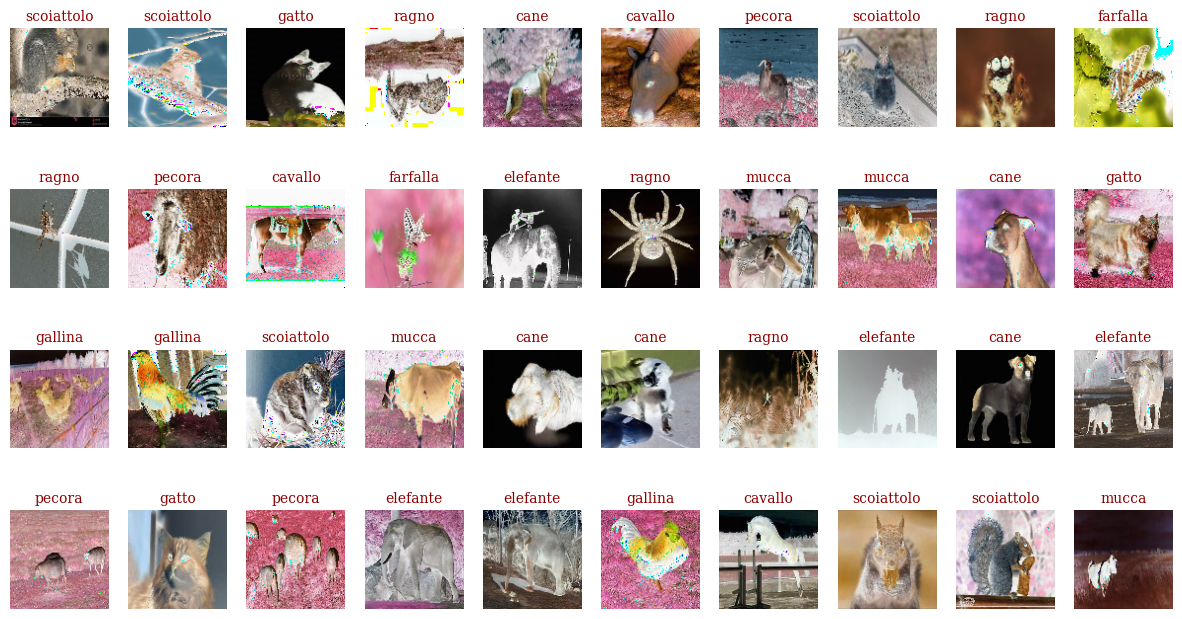

In [7]:
plt.figure(figsize=(15,8))
for i, img in enumerate(train_data_x) :
    plt.subplot(4,10, i+1)
    img = np.reshape(img, (img_size,img_size,3))
    img = (img * 255).astype("int32")
    plt.imshow(img)
    plt.axis('off')
    fontdict={'family': 'serif','color':  'darkred','weight': 'normal', 'size': 10,}
    category = categories[train_data_y[i]]
    plt.title(category, fontdict=fontdict)
    if (i+1) == 40:
        break
plt.show()

In [8]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_data_x[0].shape)
base_model.trainable = False ## Not trainable weights

## Preprocessing input
train_data_x = preprocess_input(train_data_x)
test_data_x = preprocess_input(test_data_x)

58892288/58889256 [==============================] - 45s 1us/step


In [9]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [15]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer = layers.Dense(1024, activation='relu')

model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              4719616   
Total params: 19,434,304
Trainable params: 4,719,616
Non-trainable params: 14,714,688
_________________________________________________________________


In [16]:
train_data_x_norm, test_data_x_norm = train_data_x/255.0, test_data_x/255.0

In [17]:
predictions = model.predict(test_data_x_norm)

In [18]:
predictions.shape

(1000, 1024)

In [19]:
import pandas as pd
pd.DataFrame(predictions).to_csv('predictions.csv') 